In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [9]:
df = pd.read_csv("forestfires.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'forestfires.csv'

In [ ]:
print("First 5 Rows of the Dataset:")
print(df.head())

First 5 Rows of the Dataset:
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
X           0
Y           0
month       0
day         0
FFMC        0
DMC         0
DC          0
ISI         0
temp        0
RH          0
wind        0
rain        0
area        0
log_area    0
dtype: int64


In [ ]:
# Convert categorical data (month and day) to numeric values
df['month'] = df['month'].astype('category').cat.codes
df['day'] = df['day'].astype('category').cat.codes


In [ ]:
# Normalize fire area using log transformation (handling skewness)
df['log_area'] = df['area'].apply(lambda x: np.log(x + 1))

In [ ]:
# Display dataset information
print("\nDataset Info After Preprocessing:")
df.info()



Dataset Info After Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X         517 non-null    int64  
 1   Y         517 non-null    int64  
 2   month     517 non-null    int8   
 3   day       517 non-null    int8   
 4   FFMC      517 non-null    float64
 5   DMC       517 non-null    float64
 6   DC        517 non-null    float64
 7   ISI       517 non-null    float64
 8   temp      517 non-null    float64
 9   RH        517 non-null    int64  
 10  wind      517 non-null    float64
 11  rain      517 non-null    float64
 12  area      517 non-null    float64
 13  log_area  517 non-null    float64
dtypes: float64(9), int64(3), int8(2)
memory usage: 49.6 KB


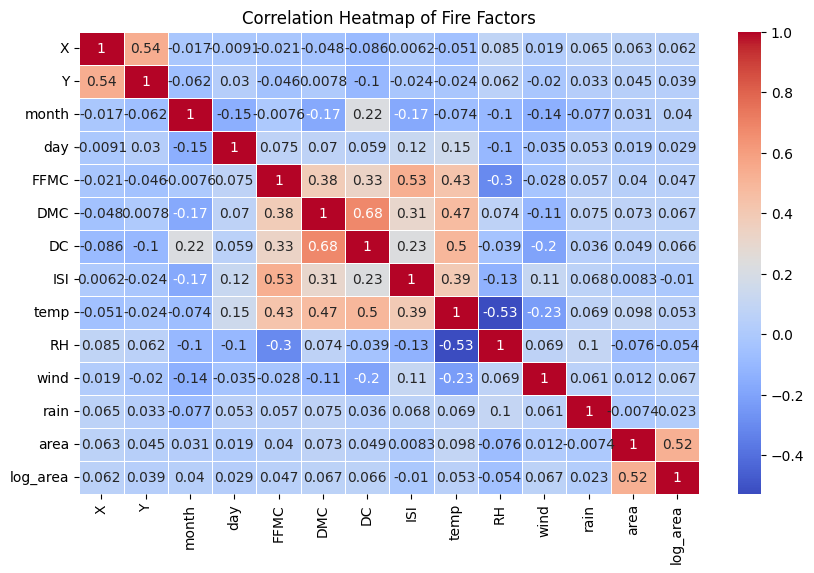

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Fire Factors")
plt.show()

In [ ]:
df.describe()

NameError: name 'df' is not defined

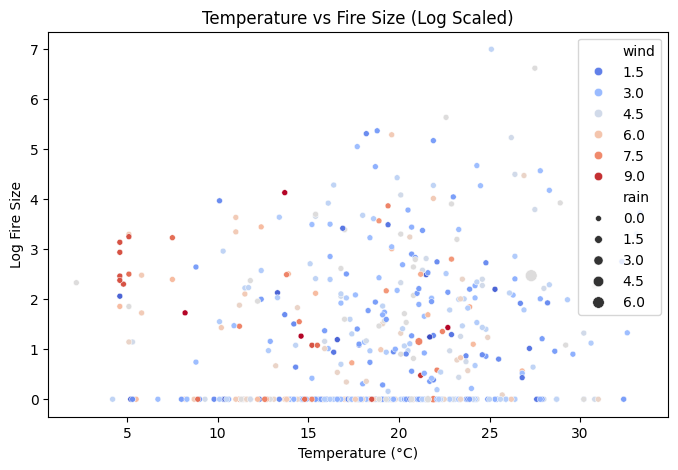

In [ ]:
# Scatter Plot: Temperature vs Fire Size
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['temp'], y=df['log_area'], hue=df['wind'], size=df['rain'], palette="coolwarm")
plt.title("Temperature vs Fire Size (Log Scaled)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Log Fire Size")
plt.show()

In [ ]:
# Geographical Fire Map
fire_map = folium.Map(location=[df["X"].mean(), df["Y"].mean()], zoom_start=6)

for index, row in df.iterrows():
    folium.CircleMarker(location=[row["X"], row["Y"]],
                        radius=row["log_area"]+1,
                        color='red', fill=True, fill_opacity=0.6).add_to(fire_map)

# Save map
fire_map.save("forest_fire_map.html")

print("\n✅ Analysis Complete! Open 'forest_fire_map.html' to see the map visualization.")



✅ Analysis Complete! Open 'forest_fire_map.html' to see the map visualization.


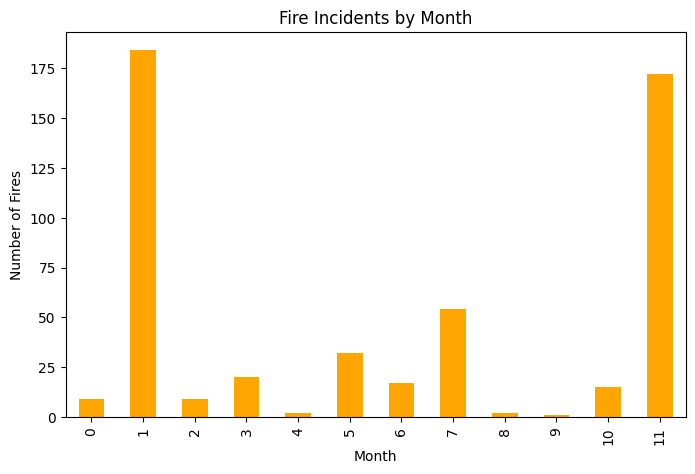

In [ ]:
# Question 1: Which month has the highest number of fires?
fire_counts_by_month = df.groupby("month").size()
plt.figure(figsize=(8,5))
fire_counts_by_month.plot(kind='bar', color='orange')
plt.title("Fire Incidents by Month")
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.show()

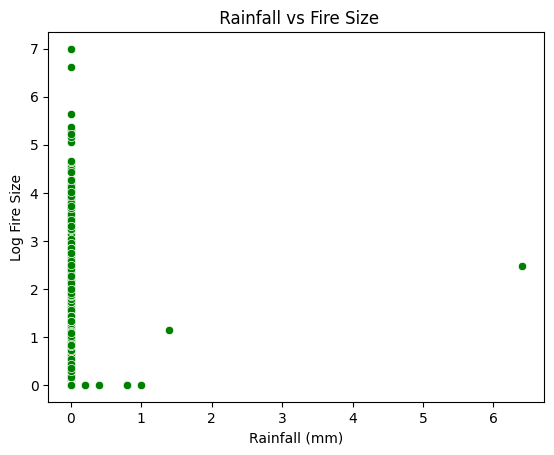

In [ ]:
# Question 3: Is there any correlation between rainfall and fire size?
sns.scatterplot(x=df['rain'], y=df['log_area'], color='green')
plt.title(" Rainfall vs Fire Size")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Log Fire Size")
plt.show()

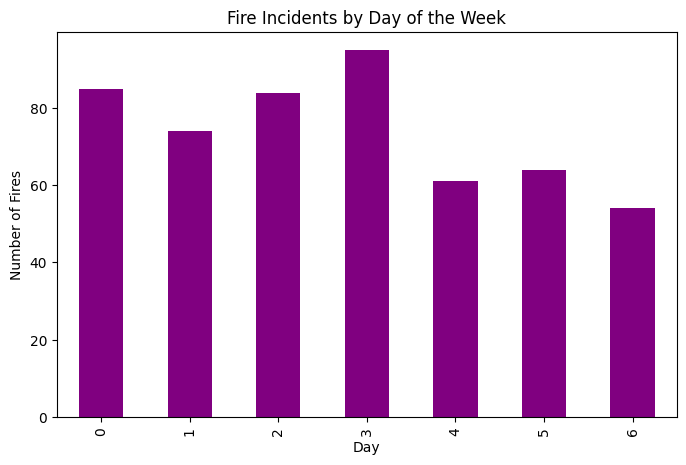

In [ ]:
# Question 5: Which day of the week sees the most fire incidents?
fire_counts_by_day = df.groupby("day").size()
plt.figure(figsize=(8,5))
fire_counts_by_day.plot(kind='bar', color='purple')
plt.title("Fire Incidents by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Fires")
plt.show()

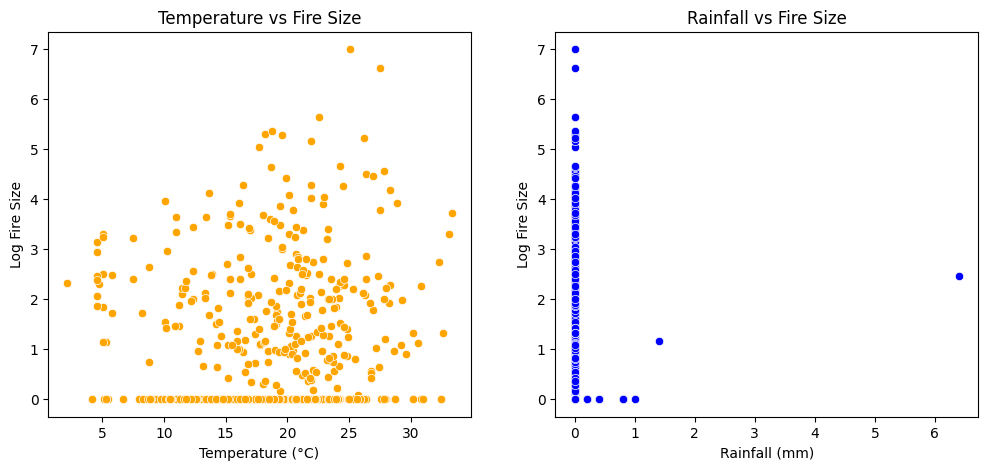

In [ ]:
# Graph Comparison: Temperature vs Rainfall Impact on Fire Size
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df['temp'], y=df['log_area'], color='orange')
plt.title("Temperature vs Fire Size")
plt.xlabel("Temperature (°C)")
plt.ylabel("Log Fire Size")

plt.subplot(1,2,2)
sns.scatterplot(x=df['rain'], y=df['log_area'], color='blue')
plt.title("Rainfall vs Fire Size")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Log Fire Size")
plt.show()

In [ ]:
!pip install scikit-learn


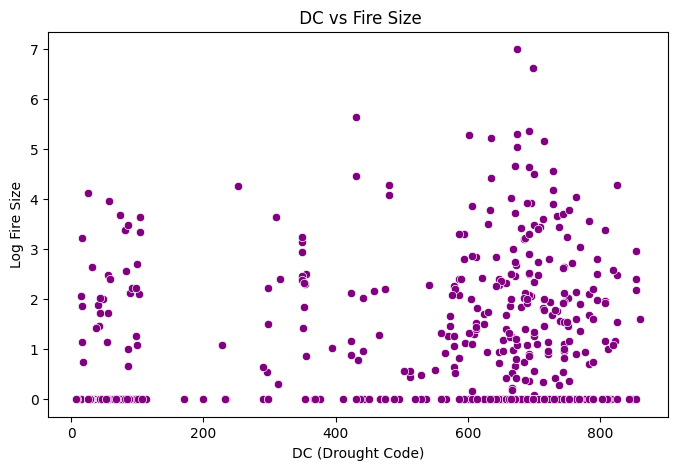

In [ ]:
# Fire Count vs DC
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['DC'], y=df['log_area'], color='purple')
plt.title(" DC vs Fire Size")
plt.xlabel("DC (Drought Code)")
plt.ylabel("Log Fire Size")
plt.show()

In [ ]:
from google.colab import files
files.download("forest_fire_map.html")



FileNotFoundError: Cannot find file: forest_fire_map.html

In [ ]:
# Sorting the dataset by burned area (descending)
sorted_fires = df.sort_values(by='area', ascending=False)

# Display top 5 largest fires
print("Top 5 Largest Fires:")
print(sorted_fires[['X', 'Y', 'month', 'day', 'area']].head())



Top 5 Largest Fires:
     X  Y month  day     area
238  6  5   sep  sat  1090.84
415  8  6   aug  thu   746.28
479  7  4   jul  mon   278.53
237  1  2   sep  tue   212.88
236  2  2   sep  sat   200.94


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving forestfires.csv to forestfires.csv


In [ ]:
import pandas as pd

df = pd.read_csv("forestfires.csv")
df.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


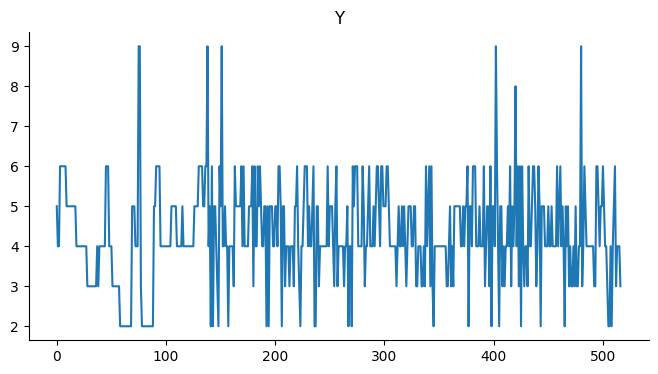

In [ ]:
# @title Y

from matplotlib import pyplot as plt
df['Y'].plot(kind='line', figsize=(8, 4), title='Y')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Filtering fires under high-risk conditions
high_risk_fires = df[(df['temp'] > 25) & (df['RH'] < 30)]

# Display filtered results
print("Fires in Hot and Dry Conditions:")
print(high_risk_fires[['temp', 'RH', 'area']])


Fires in Hot and Dry Conditions:
     temp  RH     area
14   26.4  21     0.00
28   30.2  24     0.00
30   25.4  24     0.00
45   25.9  24     0.00
55   27.7  24     0.00
86   25.4  27     0.00
145  27.4  22     0.90
154  29.6  27     1.46
156  28.6  27     1.61
228  28.3  26    64.10
230  26.4  21    88.49
231  27.8  27    95.18
238  25.1  27  1090.84
248  28.7  28     0.00
250  26.8  25     0.68
293  26.9  28    86.45
310  25.3  27     0.00
382  28.2  29     5.86
405  27.9  27     0.00
415  27.5  27   746.28
421  30.8  19     0.00
422  29.3  27     6.30
441  25.5  29     1.23
476  27.2  28     1.76
480  30.2  25     2.75
481  30.2  22     0.00
483  31.0  27     0.00
484  33.1  25    26.43
485  30.6  28     2.07
491  32.4  21     0.00
492  32.4  27     0.00
493  27.5  29    43.32
496  32.6  26     2.77
497  32.3  27    14.68
498  33.3  26    40.54
504  28.9  29    49.59


In [ ]:
# Count of fire incidents per month
print("🔥 Fire Counts by Month:")
print(df['month'].value_counts().sort_index())  # .sort_index() aligns with month codes

# Count of fire incidents by day
print("\n🔥 Fire Counts by Day of Week:")
print(df['day'].value_counts().sort_index())


🔥 Fire Counts by Month:
month
apr      9
aug    184
dec      9
feb     20
jan      2
jul     32
jun     17
mar     54
may      2
nov      1
oct     15
sep    172
Name: count, dtype: int64

🔥 Fire Counts by Day of Week:
day
fri    85
mon    74
sat    84
sun    95
thu    61
tue    64
wed    54
Name: count, dtype: int64


In [ ]:
# Create a proper date column using dummy year (e.g., 2000)
import pandas as pd

# Mapping month abbreviations to numbers (if needed)
month_map = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
             'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}

df['month_num'] = df['month'].map(month_map)
df['date'] = pd.to_datetime({'year': 2000, 'month': df['month_num'], 'day': 1})


<ipython-input-23-058de0f756cc>:13: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


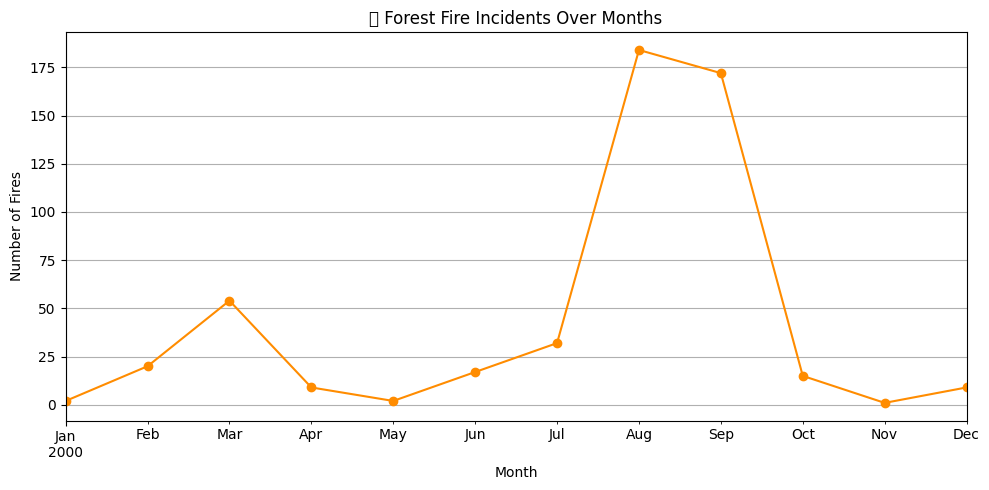

In [ ]:
# Grouping by date to count number of fire incidents per month
monthly_fire_counts = df.groupby('date').size()

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
monthly_fire_counts.plot(kind='line', marker='o', color='darkorange')
plt.title('🔥 Forest Fire Incidents Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-24-5ce67d5e9ba0>:11: UserWarning: Glyph 129001 (\N{LARGE GREEN SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129001 (\N{LARGE GREEN SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


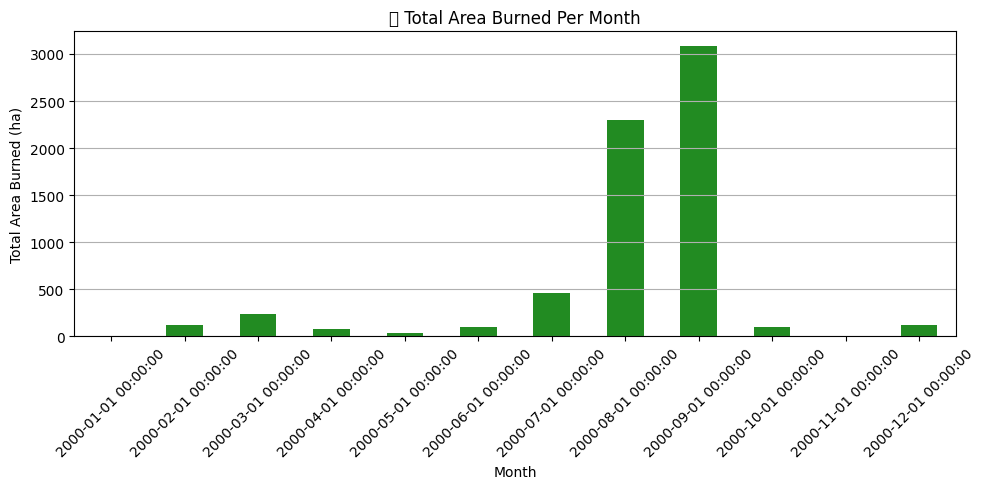

In [ ]:
#total fire area burned per month
monthly_area = df.groupby('date')['area'].sum()

plt.figure(figsize=(10, 5))
monthly_area.plot(kind='bar', color='forestgreen')
plt.title('🟩 Total Area Burned Per Month')
plt.xlabel('Month')
plt.ylabel('Total Area Burned (ha)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<ipython-input-25-eae47778457d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg_area, x='month', y='area', palette='Oranges')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


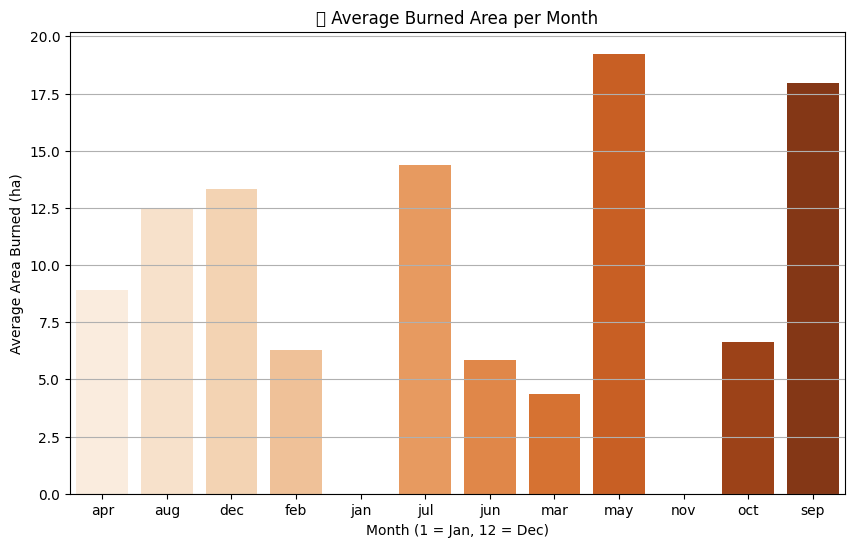

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping data: mean fire size per month
monthly_avg_area = df.groupby('month')['area'].mean().reset_index()

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=monthly_avg_area, x='month', y='area', palette='Oranges')

plt.title("Average Burned Area per Month")
plt.xlabel("Month (1 = Jan, 12 = Dec)")
plt.ylabel("Average Area Burned (ha)")
plt.grid(axis='y')
plt.show()


<ipython-input-26-d72dfb18cd3b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('month')['area'].mean().reset_index(), x='month', y='area', palette='Oranges')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


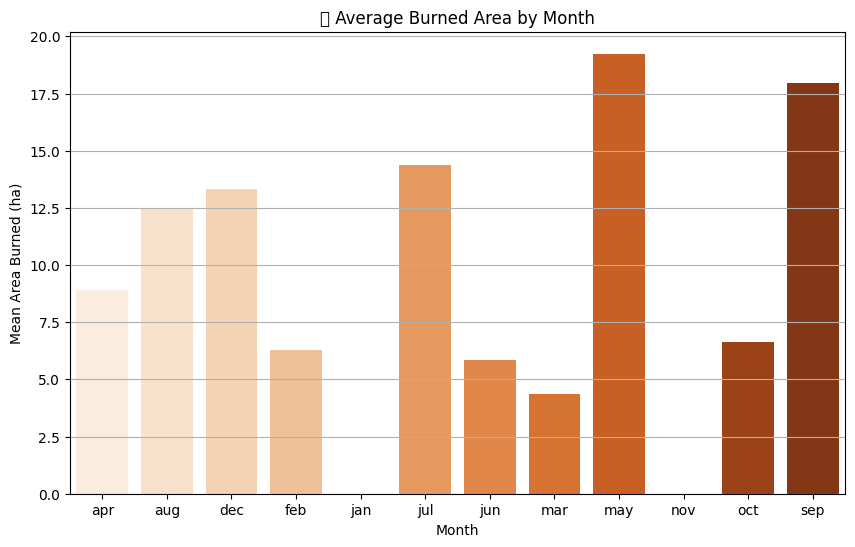

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df.groupby('month')['area'].mean().reset_index(), x='month', y='area', palette='Oranges')
plt.title("🔥 Average Burned Area by Month")
plt.xlabel("Month")
plt.ylabel("Mean Area Burned (ha)")
plt.grid(axis='y')
plt.show()


In [ ]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Week 2

In [10]:
from google.colab import files
uploaded = files.upload()


Saving forestfires.csv to forestfires.csv


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

# Load the dataset
df = pd.read_csv("forestfires.csv")

# Display the first 5 rows to verify it's loaded correctly
print("First 5 Rows of the Dataset:")
print(df.head())

First 5 Rows of the Dataset:
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [12]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Convert categorical data (month and day) to numeric values
# This is important for correlation analysis and most machine learning models
df['month'] = df['month'].astype('category').cat.codes
df['day'] = df['day'].astype('category').cat.codes

# The 'area' column is highly skewed (many small fires, a few large ones).
# A log transformation helps to normalize the distribution. We add 1 to avoid log(0).
df['log_area'] = df['area'].apply(lambda x: np.log(x + 1))

# Display dataset information after preprocessing
print("\nDataset Info After Preprocessing:")
df.info()


Missing Values:
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

Dataset Info After Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X         517 non-null    int64  
 1   Y         517 non-null    int64  
 2   month     517 non-null    int8   
 3   day       517 non-null    int8   
 4   FFMC      517 non-null    float64
 5   DMC       517 non-null    float64
 6   DC        517 non-null    float64
 7   ISI       517 non-null    float64
 8   temp      517 non-null    float64
 9   RH        517 non-null    int64  
 10  wind      517 non-null    float64
 11  rain      517 non-null    float64
 12  area      517 non-null    float64
 13  log_area  517 non-null    float64
dtypes: float64(9), int64(3), int8(2)
memory usage: 49.6 KB


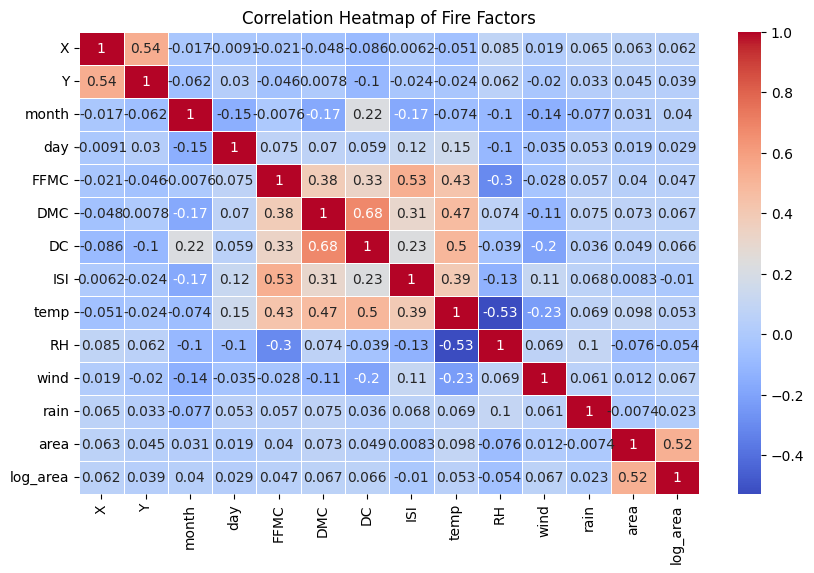

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Fire Factors")
plt.show()

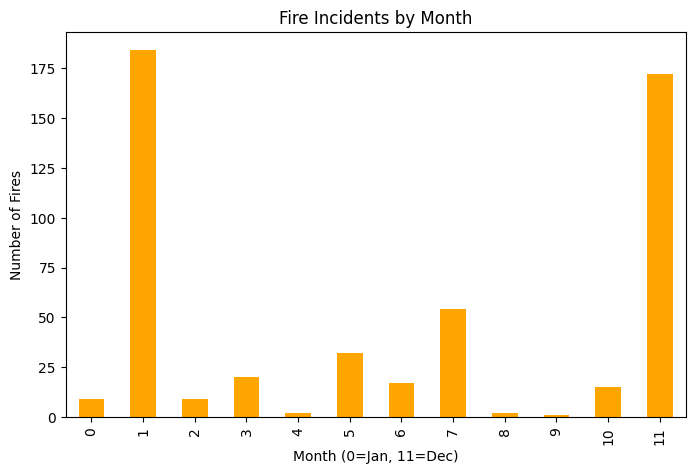

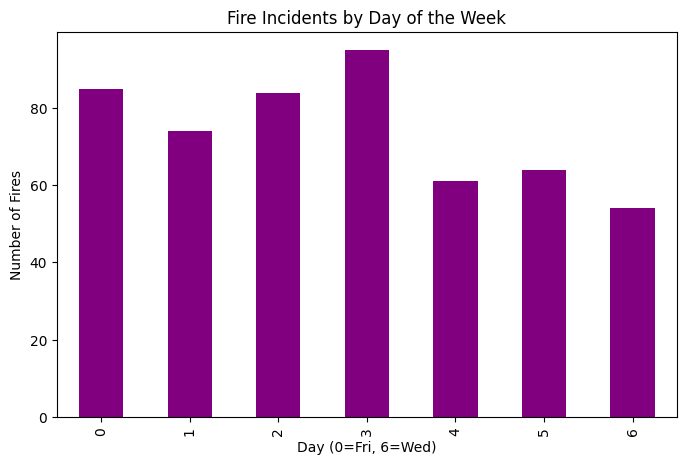

In [14]:
# Question 1: Which month has the highest number of fires?
fire_counts_by_month = df.groupby("month").size()
plt.figure(figsize=(8,5))
fire_counts_by_month.plot(kind='bar', color='orange')
plt.title("Fire Incidents by Month")
plt.xlabel("Month (0=Jan, 11=Dec)")
plt.ylabel("Number of Fires")
plt.show()

# Question 2: Which day of the week sees the most fire incidents?
fire_counts_by_day = df.groupby("day").size()
plt.figure(figsize=(8,5))
fire_counts_by_day.plot(kind='bar', color='purple')
plt.title("Fire Incidents by Day of the Week")
plt.xlabel("Day (0=Fri, 6=Wed)")
plt.ylabel("Number of Fires")
plt.show()

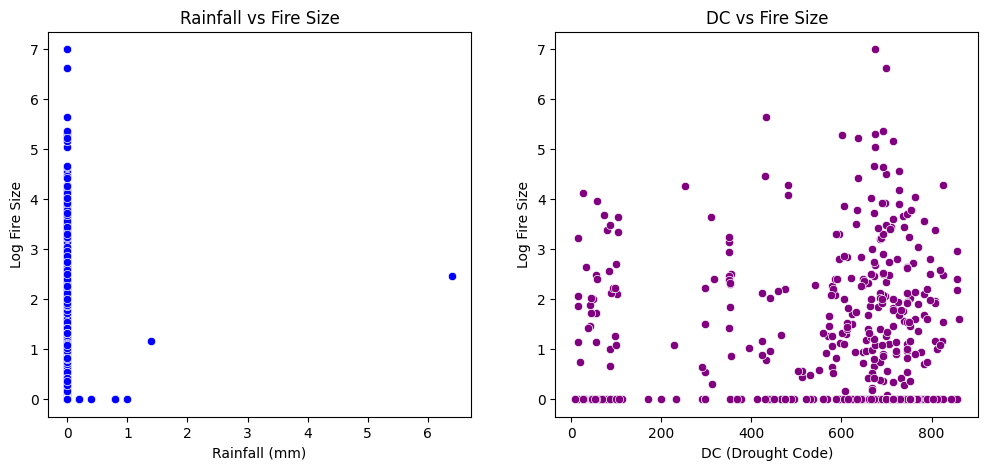

In [15]:
# Graph Comparison: Rainfall and DC vs. Fire Size
plt.figure(figsize=(12,5))

# Subplot 1: Rainfall vs Fire Size
plt.subplot(1,2,1)
sns.scatterplot(x=df['rain'], y=df['log_area'], color='blue')
plt.title("Rainfall vs Fire Size")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Log Fire Size")

# Subplot 2: DC vs Fire Size
plt.subplot(1,2,2)
sns.scatterplot(x=df['DC'], y=df['log_area'], color='purple')
plt.title("DC vs Fire Size")
plt.xlabel("DC (Drought Code)")
plt.ylabel("Log Fire Size")
plt.show()

In [16]:
# Geographical Fire Map
fire_map = folium.Map(location=[df["X"].mean(), df["Y"].mean()], zoom_start=6)

for index, row in df.iterrows():
    folium.CircleMarker(location=[row["X"], row["Y"]],
                        radius=row["log_area"]+1,
                        color='red', fill=True, fill_opacity=0.6).add_to(fire_map)

# Save map to an HTML file
fire_map.save("forest_fire_map.html")

print("\n✅ Analysis Complete! Open 'forest_fire_map.html' to see the map visualization.")


✅ Analysis Complete! Open 'forest_fire_map.html' to see the map visualization.
